Alcance =  169.4384834903816


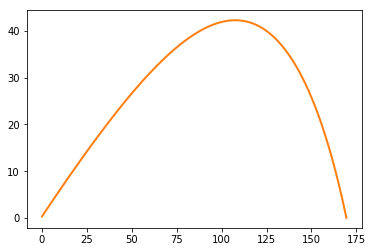

In [146]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

def fx(ca, vy, vx, m, mi):
    return -(1/m) * ca * (sqrt(vx**2 + vy**2) * vx) - mi * vx

def fy(ca, vy, vx, g, m, mi):
    return -g -(1/m) * ca * (sqrt(vx**2 + vy**2) * vy) - mi * vy

def gx(vx):
    return vx

def gy(vy):
    return vy

m = 0.010 
ca = 0.00010 
mi = 18.68e-6
g = 9.80 

h = 0.001 
t0 = 0 
x0 = 0 
y0 = 0.3 
V0 = 100.0 
tetha = 3.14159 * 30.0/ 180.0 
vx0 = V0 * cos(tetha) 
vy0 = V0 * sin(tetha) 

i   = 1;

t  = t0 ;
x  = x0 ;
y  = y0 ;
vx = vx0 ;
vy = vy0 ;

tempo = []
posicx = []
posicy = []
a =[[0],[1/5],[3/40, 9/40],[44/55, -56/15, 32/9],[19372/6561, -25360/2187, 64448/6561, -212/729],
    [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656],[35/384, 0, 500/1113, 125/192, -2187/6784, 11/84]] 

b4 = [[5179/57600], [0], [7571/16695], [393/640], [-92097/339200], [187/2100], [1/40]]
b5 = [[35/384], [0], [500/1113], [125/192], [-2187/6784], [11/84], [0]]

c = []

for i in range(6):
    c.append(sum(a[i][:]))

k1_ = np.zeros((1,7));
k2_ = np.zeros((1,7));
k3_ = np.zeros((1,7));
k4_ = np.zeros((1,7));

k1_[0][0] = h * fx(ca, vy, vx, m, mi)
k2_[0][0] = h * fy(ca, vy, vx, g, m, mi)
k3_[0][0] = h * gx(vx)
k4_[0][0] = h * gy(vy)
while(y > 0.0001):
    for j in range(7):
        k1_[0][j] = fx( ca, float(vy + h * sum(k2_[0][0:j]) * sum(a[j][0:j])), 
                       float(vx + h * sum(k1_[0][0:j]) * sum(a[j][0:j])), m, mi ) ;
        k2_[0][j] = fy( ca, float(vy + h * sum(k2_[0][0:j]) * sum(a[j][0:j])), 
                       float(vx + h * sum(k1_[0][0:j]) * sum(a[j][0:j])), g, m, mi ) ;
        k3_[0][j] = gx( vx + h * sum(k1_[0][0:j]) * sum(a[j][0:j])) ;
        k4_[0][j] = gy( vy + h * sum(k2_[0][0:j]) * sum(a[j][0:j])) ; 
    
    
    #vx = vx + h * sum(k1_[0] * b4[0]); 
    #vy = vy + h * sum(k2_[0] * b4[0]); 
    #x  =  x + h * sum(k3_[0] * b4[0]);
    #y  =  y + h * sum(k4_[0] * b4[0]);
    
    vx = vx + h * sum(k1_[0] * b5[0]); 
    vy = vy + h * sum(k2_[0] * b5[0]); 
    x  =  x + h * sum(k3_[0] * b5[0]);
    y  =  y + h * sum(k4_[0] * b5[0]);
    
    t = t + 1
    
    tempo.append(t)
    posicx.append(x)
    posicy.append(y)


print("Alcance = ", posicx[-1])
plt.plot(posicx ,posicy,'C1', linewidth=2)
plt.show()